# Titanic - Machine Learning From Disaster
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [66]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Analyze Dataset
Analyze the features and fill missing values and perform feature engineering.

### Load Dataset

Load and show train dataset

In [58]:
train_df = pd.read_csv("input/train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Load and show test dataset

In [59]:
test_df = pd.read_csv("input/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Find all features have missing values.

In [60]:
# Find all features have missing values in train dataset
print("Missing columns in train data: ", end="")
for column in train_df.columns:
    if train_df[column].hasnans:
        print(column, ":", len(train_df) - train_df[column].count(), end=" ", sep="")
print("Total:", len(train_df))

# Find all features have missing values in test dataset
print("Missing columns in test data: ", end="")
for column in test_df.columns:
    if test_df[column].hasnans:
        print(column, ":", len(test_df) - test_df[column].count(), end=" ", sep="")
print("Total:", len(test_df))

Missing columns in train data: Age:177 Cabin:687 Embarked:2 Total: 891
Missing columns in test data: Age:86 Fare:1 Cabin:327 Total: 418


Age, Cabin, Embarked and Fare have missing values. <br>
Cabin has too many missing values so remove this features. <br>
Fill missing values in Age, Embarked and Fare.

### Handle missing values.

Remove Cabin in train and test dataset

In [61]:
# remove cabin in train dataset
train_df = train_df.drop(['Cabin'], axis=1)
print(train_df.columns)

# remove cabin in test dataset
test_df = test_df.drop(['Cabin'], axis=1)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


Fill missing values in Age feature

Sex: mak.0 Class: 1 - (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <BarContainer object of 10 artists>)
Sex: female Class: 1 - (array([ 1.,  1., 12., 15.,  9., 15., 11.,  8.,  7.,  6.]), array([ 2. ,  8.1, 14.2, 20.3, 26.4, 32.5, 38.6, 44.7, 50.8, 56.9, 63. ]), <BarContainer object of 10 artists>)
Sex: mak.0 Class: 2 - (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <BarContainer object of 10 artists>)
Sex: female Class: 2 - (array([ 7.,  1.,  6.,  6., 21., 12.,  8.,  6.,  4.,  3.]), array([ 2. ,  7.5, 13. , 18.5, 24. , 29.5, 35. , 40.5, 46. , 51.5, 57. ]), <BarContainer object of 10 artists>)
Sex: mak.0 Class: 3 - (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <BarContainer object of 10 artists>)
Sex: female Class: 3 - (array([16.,  8., 21., 20., 19.,  6.,  6.,  5.,  0.,  1.]), array([ 

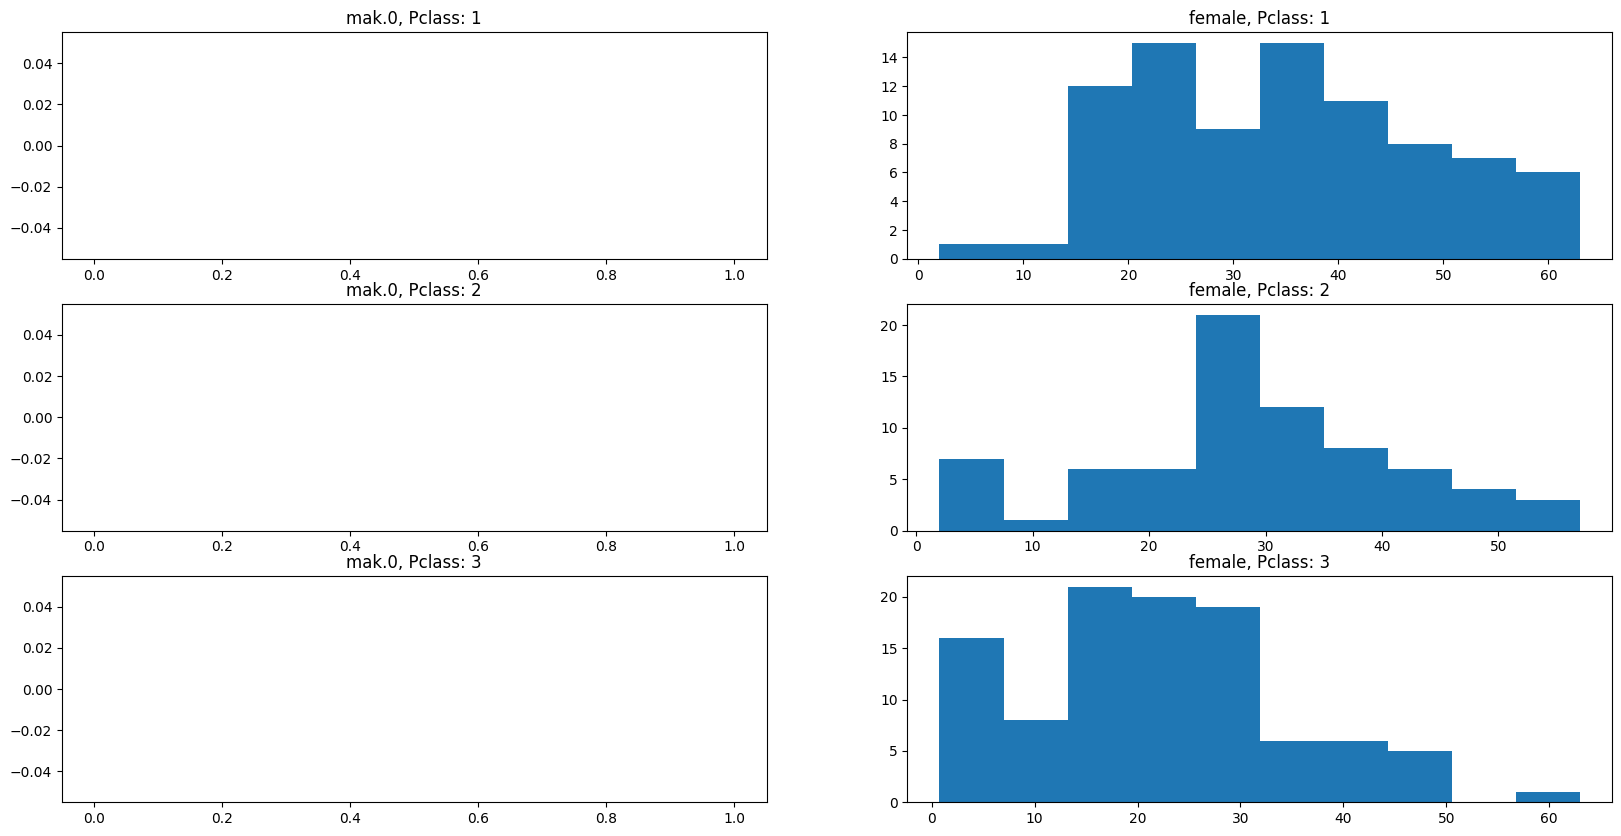

In [62]:
# Plot histogram to analyze age data
fig, axs = plt.subplots(3, 2, figsize = (20, 10))
for irow, pclass in enumerate([1, 2, 3]):    
    for icolumn, sex in enumerate(['mak.0', 'female']):
        age_data = train_df[train_df["Sex"] == sex]
        age_data = age_data[age_data["Pclass"] == pclass]
        axs[irow][icolumn].set_title(f"{sex}, Pclass: {pclass}")
        print("Sex:", sex, "Class:", pclass, "-", axs[irow][icolumn].hist(age_data['Age']))
plt.show()

Most frequent age of male pclass:1 - 32.552 <br>
Most frequent age of male pclass:2 - 28.402 <br>
Most frequent age of male pclass:3 - 15.136 <br>
Most frequent age of female pclass:1 - 26.4 <br>
Most frequent age of female pclass:2 - 24.0 <br>
Most frequent age of female pclass:3 - 13.2 <br>
Fill missing age values using this values

In [72]:
age_vals = {
    1: { "male": 32.552, "female": 26.4 },
    2: { "male": 28.402, "female": 24.0 },
    3: { "male": 15.136, "female": 13.2 }    
}

# Fill missing vaules in Age column
nan_train = train_df.isna()
for i in range(len(train_df)):
    if nan_train.loc[i, 'Age']:
        train_df.loc[i, 'Age'] = age_vals[train_df.loc[i, 'Pclass']][train_df.loc[i, 'Sex']]

train_df['Age'].count()

891